In [47]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [48]:
#load data
data = pd.read_csv("..\..\..\Data\Day\S&P 500 Historical Data00-20Ffill.csv")

In [49]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,1455.2,1469.2,1478.0,1438.4,NaN,-0.95%
1,2000-01-04,1399.4,1455.2,1455.2,1397.4,NaN,-3.83%
2,2000-01-05,1402.1,1399.4,1413.3,1377.7,NaN,0.19%
3,2000-01-06,1403.5,1402.1,1411.9,1392.0,NaN,0.10%
4,2000-01-07,1441.5,1403.5,1441.5,1400.5,NaN,2.71%


In [50]:
#transform data
data = data.replace(",", "", regex=True)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.set_index('Date')
data.Price = data.Price.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)
data["Vol."] = data["Vol."].astype(float)

In [51]:
special_data = pd.DataFrame(data)

In [52]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2014-01-01')]
special_data.index = data.index[:len(special_data)]

In [53]:
#change indexes
special_data.set_index('Date', inplace = True)

In [54]:
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,1455.2,1469.2,1478.0,1438.4,NaN,-0.95%
1,2000-01-04,1399.4,1455.2,1455.2,1397.4,NaN,-3.83%
2,2000-01-05,1402.1,1399.4,1413.3,1377.7,NaN,0.19%
3,2000-01-06,1403.5,1402.1,1411.9,1392.0,NaN,0.10%
4,2000-01-07,1441.5,1403.5,1441.5,1400.5,NaN,2.71%
5,2000-01-08,1441.5,1403.5,1441.5,1400.5,NaN,2.71%
6,2000-01-09,1441.5,1403.5,1441.5,1400.5,NaN,2.71%
7,2000-01-10,1457.6,1441.5,1464.4,1441.5,NaN,1.12%
8,2000-01-11,1438.6,1457.6,1458.8,1434.4,NaN,-1.30%
9,2000-01-12,1432.2,1439.1,1445.3,1427.3,NaN,-0.44%


In [55]:
special_data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-02,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%
2010-01-03,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%
2010-01-04,1132.99,1116.56,1133.87,1116.56,NaN,1.60%
2010-01-05,1136.52,1132.66,1136.63,1129.66,NaN,0.31%
2010-01-06,1137.14,1135.71,1139.19,1133.95,NaN,0.05%
2010-01-07,1141.69,1136.27,1142.46,1131.32,NaN,0.40%
2010-01-08,1144.98,1140.52,1145.39,1136.22,NaN,0.29%
2010-01-09,1144.98,1140.52,1145.39,1136.22,NaN,0.29%
2010-01-10,1144.98,1140.52,1145.39,1136.22,NaN,0.29%


In [56]:
special_data.tail(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-12-22,1818.32,1810.39,1823.75,1810.25,NaN,0.48%
2013-12-23,1827.99,1822.92,1829.75,1822.92,NaN,0.53%
2013-12-24,1833.32,1828.02,1833.32,1828.02,NaN,0.29%
2013-12-25,1833.32,1828.02,1833.32,1828.02,NaN,0.29%
2013-12-26,1842.02,1834.96,1842.84,1834.96,NaN,0.47%
2013-12-27,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%
2013-12-28,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%
2013-12-29,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%
2013-12-30,1841.07,1841.47,1842.47,1838.77,NaN,-0.02%


In [57]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Vol.,Change %,new_index,new_date
Date,,,,,,,,
2010-01-02,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1115.10,1115.10
2010-01-03,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1115.10,1115.10
2010-01-04,1132.99,1116.56,1133.87,1116.56,NaN,1.60%,1132.99,1132.99
2010-01-05,1136.52,1132.66,1136.63,1129.66,NaN,0.31%,1136.52,1136.52
2010-01-06,1137.14,1135.71,1139.19,1133.95,NaN,0.05%,1137.14,1137.14


In [58]:
import datetime

special_data.loc[special_data.index[0], 'new_index'] = 1262563200
special_data.loc[special_data.index[0], 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[special_data.index[0], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(1, len(special_data.new_index)):
    special_data.loc[special_data.index[i], 'new_index'] = special_data.at[special_data.index[i-1], 'new_index'] + 86400
    special_data.loc[special_data.index[i], 'new_date'] = datetime.datetime.fromtimestamp(special_data.at[special_data.index[i], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-04 07:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [59]:
special_data.index[0]

Timestamp('2010-01-02 00:00:00')

In [60]:
special_data.loc[special_data.index[0], 'new_date']

'2010-01-04 07:00:00'

In [61]:
#change indexes
date_array = special_data['new_date']

In [62]:
special_data.head(5)

,Price,Open,High,Low,Vol.,Change %,new_index,new_date
Date,,,,,,,,
2010-01-02,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262563e+09,2010-01-04 07:00:00
2010-01-03,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262650e+09,2010-01-05 07:00:00
2010-01-04,1132.99,1116.56,1133.87,1116.56,NaN,1.60%,1.262736e+09,2010-01-06 07:00:00
2010-01-05,1136.52,1132.66,1136.63,1129.66,NaN,0.31%,1.262822e+09,2010-01-07 07:00:00
2010-01-06,1137.14,1135.71,1139.19,1133.95,NaN,0.05%,1.262909e+09,2010-01-08 07:00:00


In [63]:
special_data.set_index('new_date', inplace = True)

In [64]:
special_data.head(20)

,Price,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262563e+09
2010-01-05 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262650e+09
2010-01-06 07:00:00,1132.99,1116.56,1133.87,1116.56,NaN,1.60%,1.262736e+09
2010-01-07 07:00:00,1136.52,1132.66,1136.63,1129.66,NaN,0.31%,1.262822e+09
2010-01-08 07:00:00,1137.14,1135.71,1139.19,1133.95,NaN,0.05%,1.262909e+09
2010-01-09 07:00:00,1141.69,1136.27,1142.46,1131.32,NaN,0.40%,1.262995e+09
2010-01-10 07:00:00,1144.98,1140.52,1145.39,1136.22,NaN,0.29%,1.263082e+09
2010-01-11 07:00:00,1144.98,1140.52,1145.39,1136.22,NaN,0.29%,1.263168e+09
2010-01-12 07:00:00,1144.98,1140.52,1145.39,1136.22,NaN,0.29%,1.263254e+09


In [65]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
special_data.head()

,Close,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262563e+09
2010-01-05 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262650e+09
2010-01-06 07:00:00,1132.99,1116.56,1133.87,1116.56,NaN,1.60%,1.262736e+09
2010-01-07 07:00:00,1136.52,1132.66,1136.63,1129.66,NaN,0.31%,1.262822e+09
2010-01-08 07:00:00,1137.14,1135.71,1139.19,1133.95,NaN,0.05%,1.262909e+09


In [67]:
special_data.tail()

,Close,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2013-12-29 07:00:00,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%,1.388275e+09
2013-12-30 07:00:00,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%,1.388362e+09
2013-12-31 07:00:00,1841.40,1842.97,1844.89,1839.81,NaN,-0.03%,1.388448e+09
2014-01-01 07:00:00,1841.07,1841.47,1842.47,1838.77,NaN,-0.02%,1.388534e+09
2014-01-02 07:00:00,1848.36,1842.61,1849.44,1842.41,NaN,0.40%,1.388621e+09


In [68]:
f = Forecaster(y = special_data['Close'], current_dates = special_data.index)

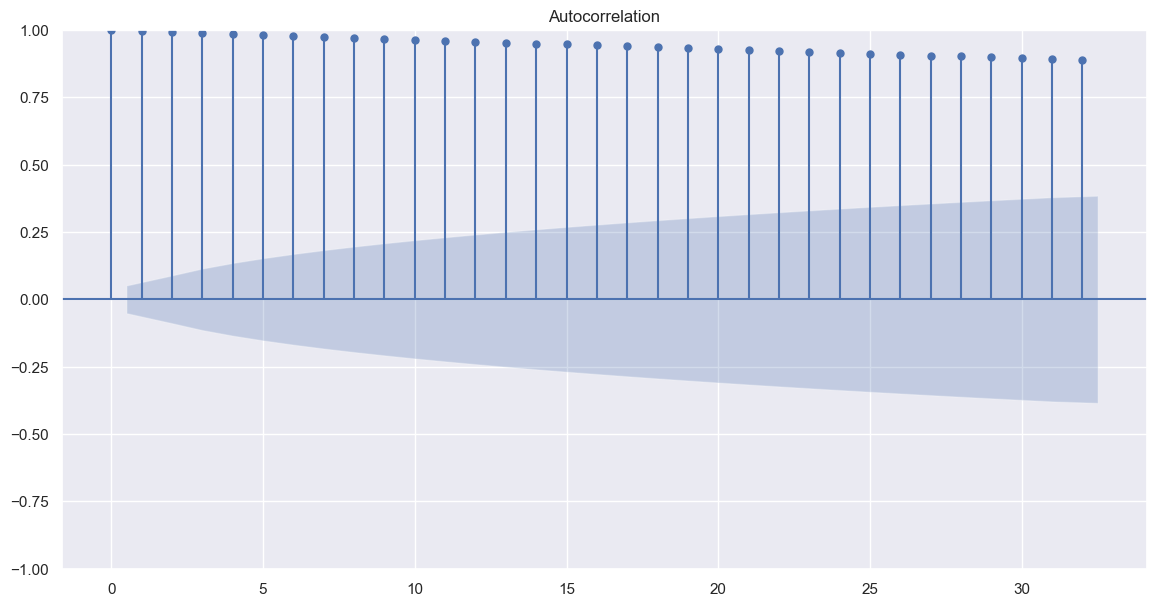

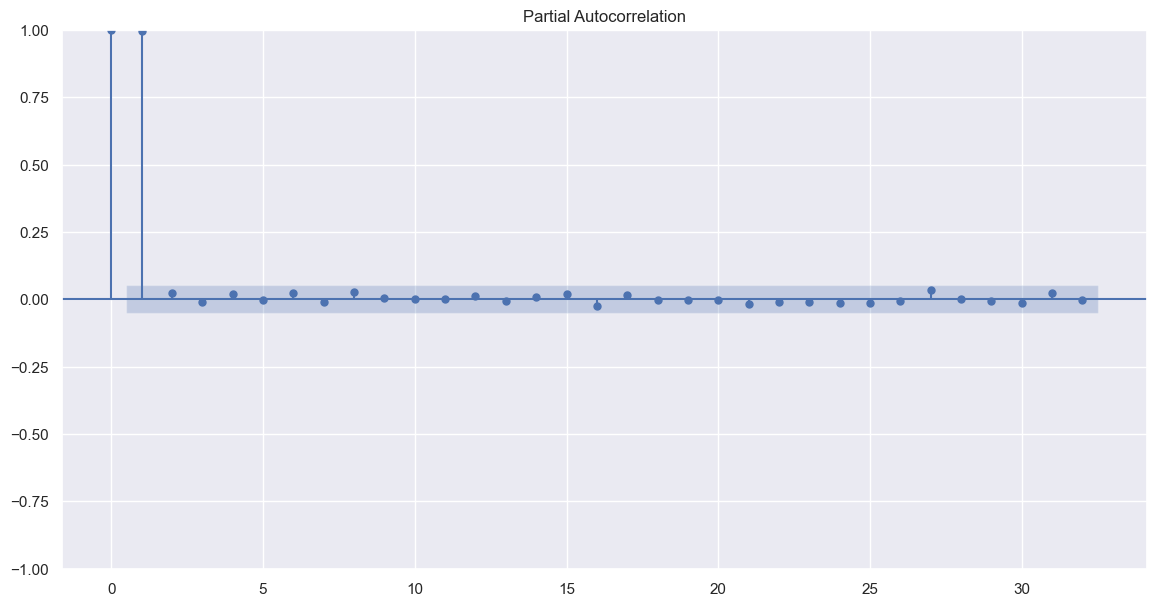

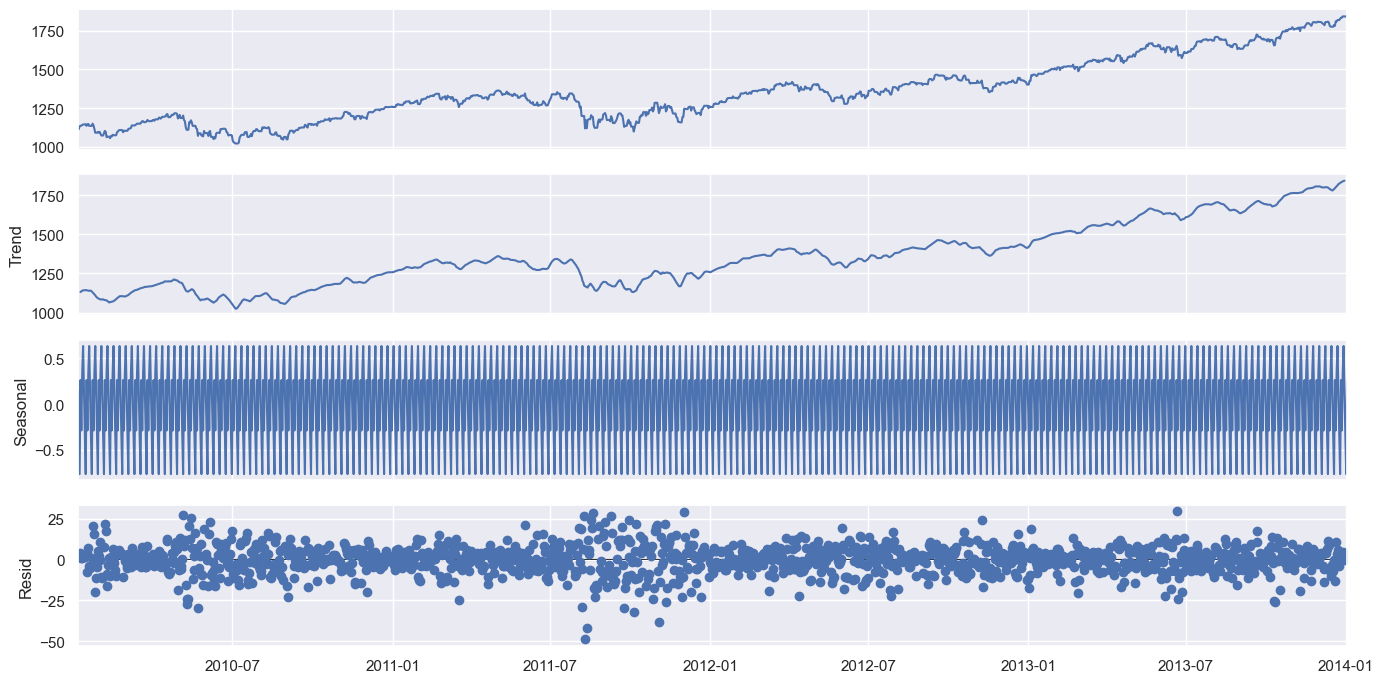

0.4246268544525403
0.9823929006106872


In [69]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [70]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size = 14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size = 14)
plt.show()

# See summary stats
f.regr.summary()

ForecastError: Before calling a model, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True).

In [71]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [72]:
adf_test(special_data['Close'])

1. ADF :  0.4246268544525403
2. P-Value :  0.9823929006106872
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1452
5. Critical Values :
	 1% :  -3.4348616379354793
	 5% :  -2.8635325860671696
	 10% :  -2.567830836482784


In [73]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5588.671
Date:                Sun, 17 Dec 2023   AIC                          11185.341
Time:                        17:43:14   BIC                          11206.483
Sample:                    01-04-2010   HQIC                         11193.228
                         - 01-02-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9412      0.545      1.727      0.084      -0.127       2.009
ar.L1         -0.8713      0.052    -16.608      0.000      -0.974      -0.768
ma.L1          0.8227      0.061     13.483      0.000       0.703       0.942
sigma2       124.3259      2.642     47.057      0.000     119.148     129.504
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1570.08
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.46
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# Находим последний год в данных
last_year = pd.to_datetime(special_data.index).year.max()

# Определяем начало и конец последнего квартала последнего года
validation_start_date = pd.to_datetime(f'{last_year}-10-01')
validation_end_date = pd.to_datetime(f'{last_year}-12-31')
data_len = len(special_data)

In [75]:
train_len = data_len * 0.9
test_len = data_len - train_len

In [76]:
train_data = special_data.iloc[:int(train_len)]

In [77]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [78]:
test_data.Close

new_date
2013-08-10 07:00:00    1697.48
2013-08-11 07:00:00    1691.42
2013-08-12 07:00:00    1691.42
2013-08-13 07:00:00    1691.42
2013-08-14 07:00:00    1689.47
                        ...   
2013-12-29 07:00:00    1841.40
2013-12-30 07:00:00    1841.40
2013-12-31 07:00:00    1841.40
2014-01-01 07:00:00    1841.07
2014-01-02 07:00:00    1848.36
Name: Close, Length: 146, dtype: float64

In [79]:
train_data

,Close,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262563e+09
2010-01-05 07:00:00,1115.10,1126.60,1127.64,1114.81,NaN,-1.00%,1.262650e+09
2010-01-06 07:00:00,1132.99,1116.56,1133.87,1116.56,NaN,1.60%,1.262736e+09
2010-01-07 07:00:00,1136.52,1132.66,1136.63,1129.66,NaN,0.31%,1.262822e+09
2010-01-08 07:00:00,1137.14,1135.71,1139.19,1133.95,NaN,0.05%,1.262909e+09
...,...,...,...,...,...,...,...
2013-08-05 07:00:00,1709.67,1706.10,1709.67,1700.68,NaN,0.16%,1.375661e+09
2013-08-06 07:00:00,1709.67,1706.10,1709.67,1700.68,NaN,0.16%,1.375747e+09
2013-08-07 07:00:00,1707.14,1708.01,1709.24,1703.55,NaN,-0.15%,1.375834e+09


In [80]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=10123.529, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=10121.747, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=10121.478, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=10120.861, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=10122.533, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=10119.331, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=10121.428, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=10113.634, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=10115.595, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=10117.410, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=10119.404, Time=0.44 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=10115.890, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=10120.979, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=10115.596, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=10114.737, Time=0.42

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1314
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -5041.684
Date:                Sun, 17 Dec 2023   AIC                          10105.369
Time:                        17:43:40   BIC                          10162.349
Sample:                    01-04-2010   HQIC                         10126.737
                         - 08-09-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2725      0.272      1.004      0.316      -0.260       0.805
ar.L1         -0.9352      0.125     -7.477      0.000      -1.180      -0.690
ar.L2         -0.0290      0.155     -0.187      0.851      -0.332       0.274
ar.L3          0.9091      0.159      5.704      0.000       0.597       1.222
ar.L4          0.4995      0.140      3.577      0.000       0.226       0.773
ar.L5         -0.0772      0.029     -2.636      0.008      -0.135      -0.020
ma.L1          0.8949      0.123      7.300      0.000       0.655       1.135
ma.L2          0.0290      0.144      0.201      0.841      -0.254       0.312
ma.L3         -0.9319      0.145     -6.431      0.000      -1.216      -0.648
ma.L4         -0.5017      0.126     -3.995      0.000      -0.748      -0.256
sigma2       126.5064      3.088     40.970      0.000     120.455     132.558
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1451.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.63
Prob(H) (two-sided):                  0.22   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

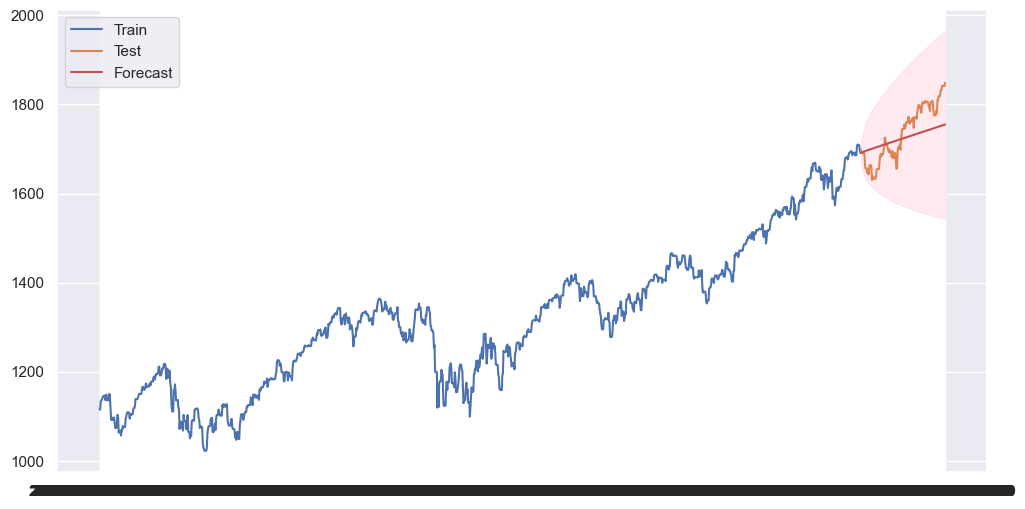

In [81]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [82]:
def calculate_metrics(array1, array2):
    # Проверка на совпадение длин массивов
    if len(array1) != len(array2):
        raise ValueError("Длины массивов должны совпадать")

    # Вычисление отклонений
    deviations = np.abs(np.array(array1) - np.array(array2))

    # Минимальное и максимальное отклонение
    min_deviation = np.min(deviations)
    max_deviation = np.max(deviations)

    # Процентное минимальное и максимальное отклонение
    min_deviation_percentage = min_deviation / np.max(np.abs(array1)) * 100
    max_deviation_percentage = max_deviation / np.max(np.abs(array1)) * 100

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(deviations / np.abs(array1)) * 100

    return min_deviation, max_deviation, min_deviation_percentage, max_deviation_percentage, mape


In [88]:
min_dev, max_dev, min_dev_percentage, max_dev_percentage, mape = calculate_metrics(test_data.Close, forecast.values)

print(f"Минимальное отклонение: {min_dev}")
print(f"Максимальное отклонение: {max_dev}")
print(f"Процентное минимальное отклонение: {min_dev_percentage:.2f}%")
print(f"Процентное максимальное отклонение: {max_dev_percentage:.2f}%")
print(f"MAPE: {mape:.2f}%")

Минимальное отклонение: 0.15424012185530955
Максимальное отклонение: 93.51274542097713
Процентное минимальное отклонение: 0.01%
Процентное максимальное отклонение: 5.06%
MAPE: 2.32%


In [84]:
len(special_data)

1460

In [85]:
len(train_data)

1314

In [86]:
len(test_data)

146